In [4]:
import numpy as np
from skimage import io 
from skimage.color import rgb2lab, lab2rgb, rgba2rgb
from skimage.morphology import thin
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize

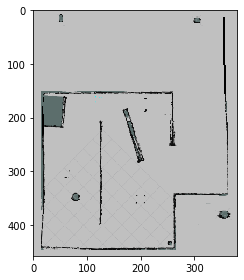

In [5]:
test_map = io.imread("test_mapUp1.png")
io.imshow(test_map)

(200, 150, 4)


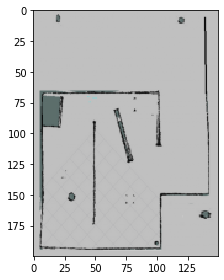

In [6]:
image_resized = resize(test_map, (2000, 1500),anti_aliasing=True)
io.imshow(image_resized)
test_map = image_resized
print(np.shape(test_map))

In [7]:
#print(test_map)
print(np.min(test_map),np.max(test_map))
print(np.shape(test_map))
print(test_map[0][0])
test_map_rgb = test_map[:,:,0:3]
print(np.shape(test_map_rgb))

0.039949171634192454 1.0
(200, 150, 4)
[0.75294118 0.75294118 0.75294118 1.        ]
(200, 150, 3)


(200, 150)


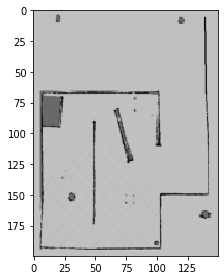

In [8]:
im_lab=rgb2lab(test_map_rgb)
im_lab[...,1]=im_lab[...,2]=0
gray_test_map_temp=lab2rgb(im_lab)

gray_test_map = np.zeros((gray_test_map_temp.shape[0],gray_test_map_temp.shape[1]))
for i in range(gray_test_map_temp.shape[0]):
    for j in range(gray_test_map_temp.shape[1]):
        gray_test_map[i][j] = np.average(gray_test_map_temp[i][j])

print(np.shape(gray_test_map))
io.imshow(gray_test_map)

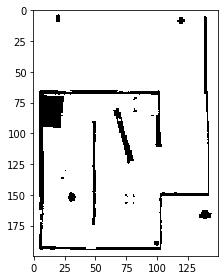

In [9]:
binary_test_map = gray_test_map > 0.65
np.shape(gray_test_map)
io.imshow(binary_test_map)

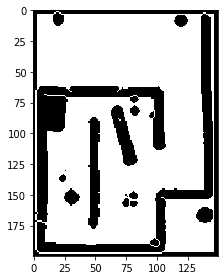

In [12]:
binary_thick_map = thin(binary_test_map, max_num_iter=3)
io.imshow(binary_thick_map)

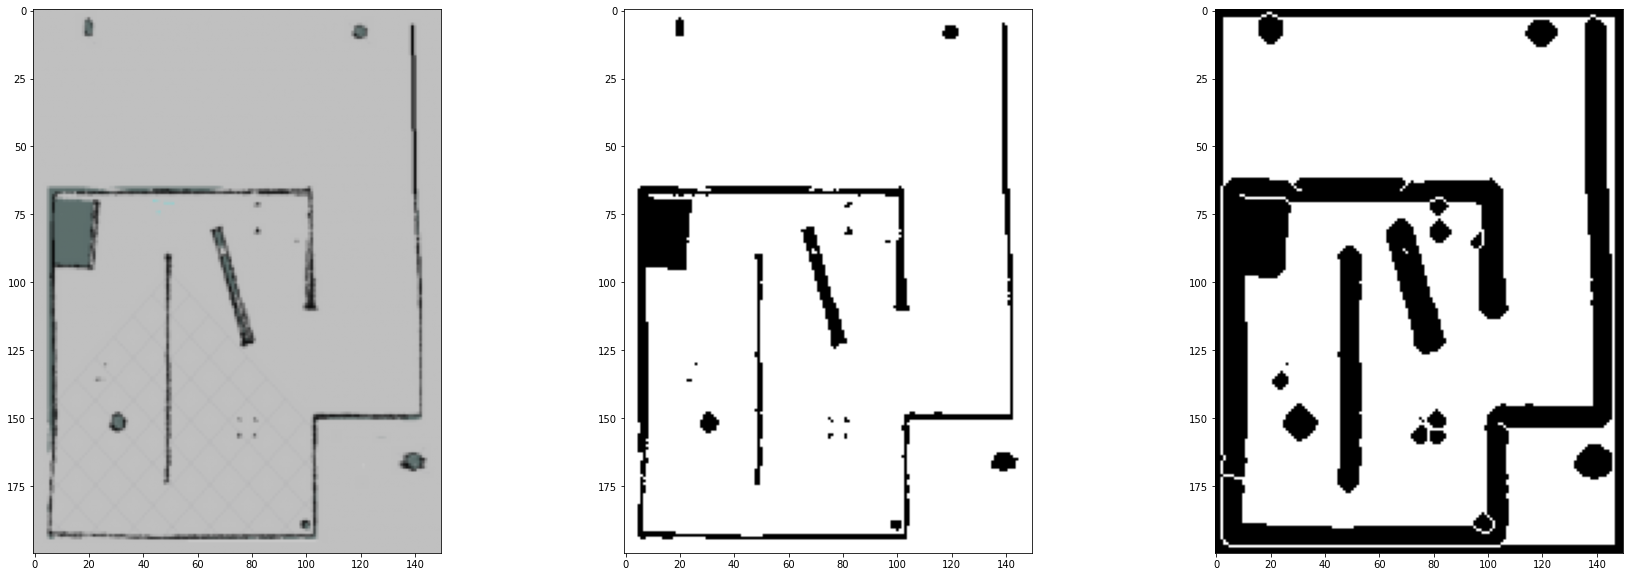

In [13]:
plt.figure(figsize=(30,10))
plt.subplot(131),plt.imshow(test_map)
plt.subplot(132),plt.imshow(binary_test_map,cmap=plt.cm.gray)
plt.subplot(133),plt.imshow(binary_thick_map,cmap=plt.cm.gray)
plt.show()